> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - TMDb movie data
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

The Movie Database (TMDB) is a community built movie and TV database. Every piece of data has been added by our amazing community dating back to 2008. TMDb's strong international focus and breadth of data is largely unmatched and something we're incredibly proud of. Put simply, we live and breathe community and that's precisely what makes us different.

**The TMDB Advantage**

- 1 Every year since 2008, the number of contributions to our database has increased. With over 400,000 developers and companies using our platform, TMDB has become a premiere source for metadata.

- 2 Along with extensive metadata for movies, TV shows and people, we also offer one of the best selections of high resolution posters and fanart. On average, over 1,000 images are added every single day.

- 3 We're international. While we officially support 39 languages we also have extensive regional data. Every single day TMDB is used in over 180 countries.

- 4 Our community is second to none. Between our staff and community moderators, we're always here to help. We're passionate about making sure your experience on TMDB is nothing short of amazing.

- 5 Trusted platform. Every single day our service is used by millions of people while we process over 3 billion requests. We've proven for years that this is a service that can be trusted and relied on.

[source](https://www.themoviedb.org/about)

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

1) Which genres are most popular from year to year? 
2) What kinds of properties are associated with movies that have high revenues?
3) 


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# loading packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('./Database_TMDb_movie_data/tmdb-movies.csv')


### Printing DataFrame's data type and dimensions

In [4]:
df.shape

(10866, 21)

The TMdb dataset contains 10866 rows and 21 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

As we can see there are missing values in some columns of our dataset. We'll handle them shortly.

### Printing DataFrame's head

In [6]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Here is presented the first 5 rows of the TMdb dataset, lets dive in. 

The are `Id` and `imdb_id` columns corresponding to each film.

The film runtime `runtime`

The is `popularity` of the film

The film budget `budget_adj` and the film revenue `revenue_adj` adjusted to the inflation over time

The `genres` of the movie, the `production_compagnies` the `release_date`, the audience votes `vote_count` and the average vote `vote_average`.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In this part there are columns that are not valuable for our analysis such as `homepage`, `tagline`,`keywords`, `overview`, `budget`and `revenue`.

We'll also identify and count rows with crucial missing values such as  `revenue_adj`, `budget_adj`, `cast`, `genres`. Even though we could fill numeric columns with the `mean()`, how can we deal with missing `cast` or missing `genres` ? We can't predict or fill them. 

For the numeric values we will count and if there are minor we'll drop all of them. Otherwise We'll fill them with the `mean()`. 

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [8]:
df.drop(['homepage', 'tagline','keywords', 'overview', 'budget', 'revenue'], 
        axis=1,
        inplace=True)

Let's print the head of the new DataFrame.

In [9]:
df.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Descriptive Statistics

Let's describe basic statistics for each numeric column of our dataset.

In [10]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As we can see, there are problems with some rows like `runtime`, `budget_adj`, `revenue_adj` where most values are missing or are `Zeros`. We'll count them all.

In [11]:
df.isnull().any(axis=1).sum()

1095

In [12]:
100 * df.isnull().any(axis=1).sum() / df.shape[0]

10.077305356156819

There are 1095 rows with at least one missing value, representing 10.07% of our dataset.

In [13]:
100 * (df.shape[0] - df.isnull().any(axis=1).sum()) / df.shape[0]

89.92269464384319

The correct values of our dataset represent 89.92% of it. Though we have 10866 rows, we can drop all of the incorrect values.

In [14]:
df.dropna(inplace=True)

Let's look about duplicates in our dataset.

In [15]:
df.duplicated().sum()

1

There is one duplicate in our dataset. We'll drop it.

In [16]:
df.drop_duplicates(inplace=True)

Now that we have cleaned our dataset, let's describe it again.

In [17]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9.770000e+03,9.770000e+03
mean,63190.584033,0.694775,102.939611,239.353224,5.963388,2000.876766,1.941997e+07,5.706477e+07
std,90725.204030,1.037027,27.865500,603.066348,0.913207,13.037610,3.566891e+07,1.514632e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10220.500000,0.232620,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,100.000000,46.000000,6.000000,2005.000000,3.179631e+05,0.000000e+00
75%,70541.750000,0.776465,112.000000,173.000000,6.600000,2011.000000,2.467646e+07,4.312856e+07
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


Let's count the `Zeros` values in `runtime`, `budget_adj`, `revenue_adj` columns.

In [18]:
(df['revenue_adj']==0).sum()

5020

There are 5020 Null values in the `revenue_adj` column. How Huge they are.

In [19]:
(df['budget_adj']==0).sum()

4749

There are 4749 Null values in the `budget_adj` column. How Huge they are.

In [20]:
(df['runtime']==0).sum()

13

There are 13 Null values in the `runtime` column.

We can't drop them, the number is so important.

We'll fill the zeros values per colum with the mean. Let's proceed.

Let's look after columns with at least one null value

In [21]:
col_with_value_null = [col for col in df.columns if (df[col]==0).any() ]
col_with_value_null

['runtime', 'budget_adj', 'revenue_adj']

Let's calculate and fill the zeros by the mean.

In [22]:
mean = {col: df[col].mean() for col in col_with_value_null}
#print(mean)
fill = [df[col].replace(to_replace=0, value=mean[col], inplace=True) for col in mean.keys()]

In [23]:
# Deleting unnecessary variables
del col_with_value_null, mean, fill

Now that we have filled zeros values of our dataset, let's describe it again.

In [24]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9.770000e+03,9.770000e+03
mean,63190.584033,0.694775,103.076583,239.353224,5.963388,2000.876766,2.885962e+07,8.638567e+07
std,90725.204030,1.037027,27.610977,603.066348,0.913207,13.037610,3.161990e+07,1.428564e+08
min,5.000000,0.000188,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10220.500000,0.232620,91.000000,18.000000,5.400000,1994.000000,1.941997e+07,4.907877e+07
50%,18677.500000,0.419762,100.000000,46.000000,6.000000,2005.000000,1.941997e+07,5.706477e+07
75%,70541.750000,0.776465,112.000000,173.000000,6.600000,2011.000000,2.467646e+07,5.706477e+07
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9770 non-null   int64  
 1   imdb_id               9770 non-null   object 
 2   popularity            9770 non-null   float64
 3   original_title        9770 non-null   object 
 4   cast                  9770 non-null   object 
 5   director              9770 non-null   object 
 6   runtime               9770 non-null   float64
 7   genres                9770 non-null   object 
 8   production_companies  9770 non-null   object 
 9   release_date          9770 non-null   object 
 10  vote_count            9770 non-null   int64  
 11  vote_average          9770 non-null   float64
 12  release_year          9770 non-null   int64  
 13  budget_adj            9770 non-null   float64
 14  revenue_adj           9770 non-null   float64
dtypes: float64(5), int64

Let's convert the data type of `release_date` to `datetime`

In [26]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9770 non-null   int64         
 1   imdb_id               9770 non-null   object        
 2   popularity            9770 non-null   float64       
 3   original_title        9770 non-null   object        
 4   cast                  9770 non-null   object        
 5   director              9770 non-null   object        
 6   runtime               9770 non-null   float64       
 7   genres                9770 non-null   object        
 8   production_companies  9770 non-null   object        
 9   release_date          9770 non-null   datetime64[ns]
 10  vote_count            9770 non-null   int64         
 11  vote_average          9770 non-null   float64       
 12  release_year          9770 non-null   int64         
 13  budget_adj       

In [28]:
df.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


For further analysis, we will add new columns in our dataframe.
- `gain_adj` the gain value (`revenue_adj - budget_adj` ) for each film
- `release_month` the month value of the release date
- `release_month_name` the month name of the release date
- `genre_01` for the first genre of the film
- `genre_02` for the second genre of the film
- `genre_03` for the third genre of the film
- `director_01` for the first director of the film
- `director_02` for the co-director of the film
- `prod_comp_01` for the first production company of the film. 
- `prod_comp_02` for the second production company of the film.
- `cast_num` the number of cast members of the film
- `actor_01` the first actor of the film
- `actor_02` the second actor of the film
- `actor_03` the third actor of the film
- `actor_04` the fourth actor of the film
- `year_by_5` group years by 5 of length. Ex: 1965[included]-1970[excluded], 1970[included]-1975[excluded] and so on
- `year_by_10` group years by 10 of length. Ex: 1965[included]-1975[excluded], 1975[included]-1985[excluded] and so on

The list of all actors who appeared in a film and the number of their appearance overall time.

In [29]:
df['gain_adj'] = df['revenue_adj'] - df['budget_adj']

In [30]:
df['release_month'] = pd.DatetimeIndex(df['release_date']).month

In [31]:
df['release_month_name'] = pd.DatetimeIndex(df['release_date']).month_name()

In [32]:
5 * (1967//5), 5 * (1967//5 + 1)

(1965, 1970)

In [33]:
5 * (1970//5), 5 * (1970//5 + 1)

(1970, 1975)

In [34]:
df['year_by_5'] = df['release_year'].apply(lambda val: f'{5 * (val//5)}-{5 * (val//5 + 1)}')

In [35]:
df['year_by_10'] = df['release_year'].apply(lambda val: f'{10 * (val//10)}-{10 * (val//10 + 1)}')

In [36]:
df['genre_01'] = df['genres'].apply(lambda val: f"{val.split('|')[0] if len(val.split('|')) > 0 else val}")

In [37]:
df['genre_02'] = df['genres'].apply(lambda val: f"{val.split('|')[1] if len(val.split('|')) > 1 else val}")

In [38]:
df['genre_03'] = df['genres'].apply(lambda val: f"{val.split('|')[2] if len(val.split('|')) > 2 else val}")

In [39]:
df['director_01'] = df['director'].apply(lambda val: f"{val.split('|')[0] if len(val.split('|')) > 0 else val}")

In [40]:
df['director_02'] = df['director'].apply(lambda val: f"{val.split('|')[1] if len(val.split('|')) > 1 else val}")

In [41]:
df['prod_comp_01'] = df['production_companies'].apply(lambda val: f"{val.split('|')[0] if len(val.split('|')) > 0 else val}")

In [42]:
df['prod_comp_02'] = df['production_companies'].apply(lambda val: f"{val.split('|')[1] if len(val.split('|')) > 1 else val}")

In [43]:
df['cast_num'] = df['cast'].apply(lambda val: int(f"{len(val.split('|')) if len(val.split('|')) > 0 else np.nan}"))

In [44]:
df['actor_01'] = df['cast'].apply(lambda val: f"{val.split('|')[0] if len(val.split('|')) > 0 else np.nan}")

In [45]:
df['actor_02'] = df['cast'].apply(lambda val: f"{val.split('|')[1] if len(val.split('|')) > 1 else np.nan}")

In [46]:
df['actor_03'] = df['cast'].apply(lambda val: f"{val.split('|')[2] if len(val.split('|')) > 2 else np.nan}")

In [47]:
df['actor_04'] = df['cast'].apply(lambda val: f"{val.split('|')[3] if len(val.split('|')) > 3 else np.nan}")

In [48]:
df.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,...,genre_03,director_01,director_02,prod_comp_01,prod_comp_02,cast_num,actor_01,actor_02,actor_03,actor_04
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,...,Science Fiction,Colin Trevorrow,Colin Trevorrow,Universal Studios,Amblin Entertainment,5,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,...,Science Fiction,George Miller,George Miller,Village Roadshow Pictures,Kennedy Miller Productions,5,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,...,Thriller,Robert Schwentke,Robert Schwentke,Summit Entertainment,Mandeville Films,5,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,...,Science Fiction,J.J. Abrams,J.J. Abrams,Lucasfilm,Truenorth Productions,5,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,...,Thriller,James Wan,James Wan,Universal Pictures,Original Film,5,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez


In [49]:
df.to_csv('TMdb_edited.csv', index=False)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10865
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9770 non-null   int64         
 1   imdb_id               9770 non-null   object        
 2   popularity            9770 non-null   float64       
 3   original_title        9770 non-null   object        
 4   cast                  9770 non-null   object        
 5   director              9770 non-null   object        
 6   runtime               9770 non-null   float64       
 7   genres                9770 non-null   object        
 8   production_companies  9770 non-null   object        
 9   release_date          9770 non-null   datetime64[ns]
 10  vote_count            9770 non-null   int64         
 11  vote_average          9770 non-null   float64       
 12  release_year          9770 non-null   int64         
 13  budget_adj       

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: What is the mean film budget over the years?

For that we will group our dataset by years and get the mean film budget for each year and plot.

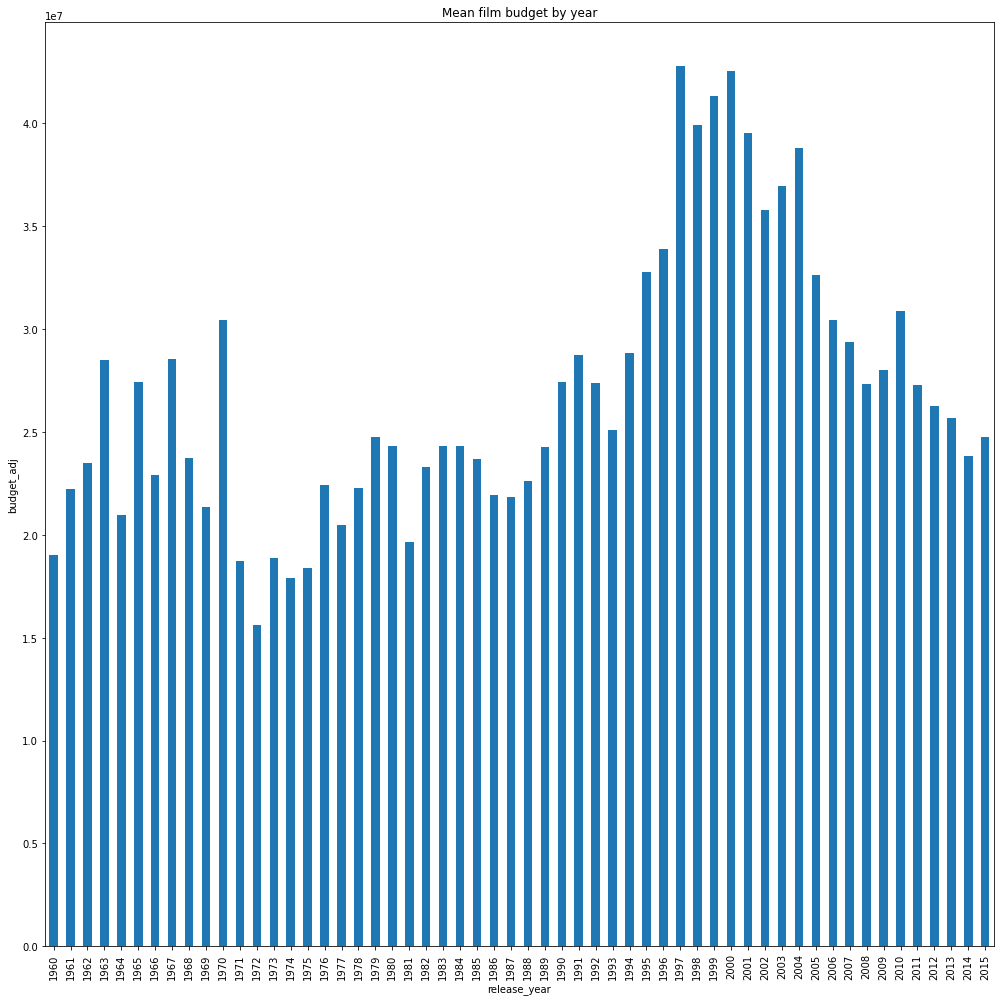

In [51]:
df.groupby('release_year').mean()['budget_adj'].plot(kind='bar', 
                                                     figsize=(17, 17), 
                                                     title='Mean film budget by year', 
                                                     ylabel='budget_adj');

As we can see, there has been an increasing films budgets in the early 2000's, why? Perhaps beacause of the vulgarisation of the films distribution means, Internet apparition, devices, communication possibilities, and so on...

### Research Question 2  What is the mean film revenue over the years?

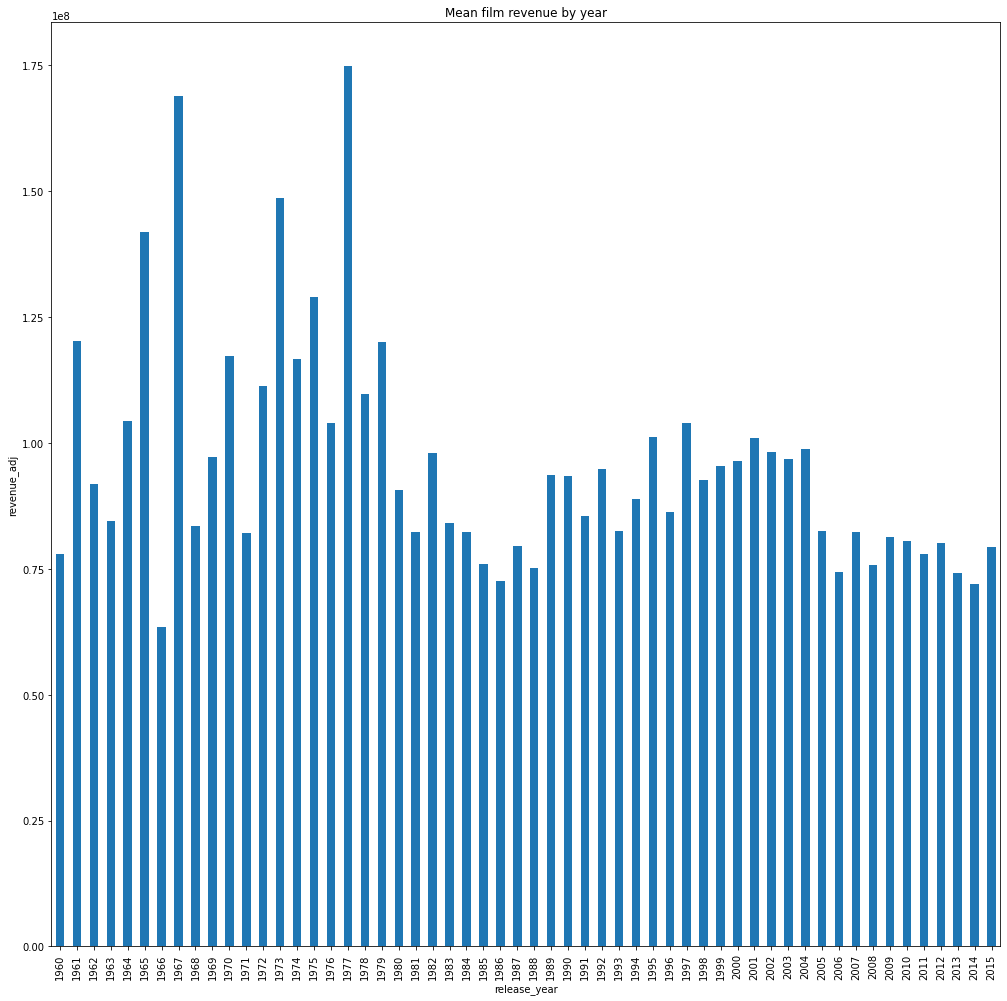

In [52]:
df.groupby('release_year').mean()['revenue_adj'].plot(kind='bar', 
                                                     figsize=(17, 17), 
                                                     title='Mean film revenue by year', 
                                                     ylabel='revenue_adj');

### Research Question 3  What is the mean film gain over the years?

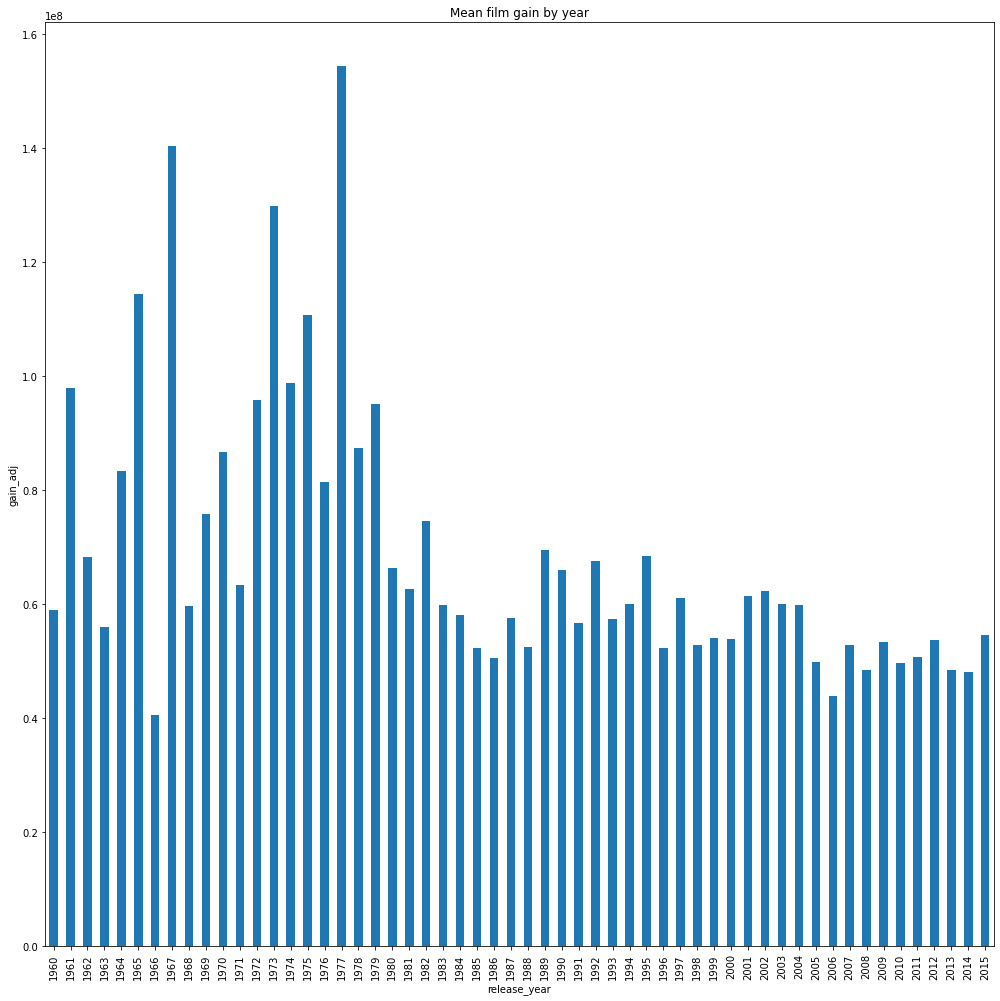

In [53]:
df.groupby('release_year').mean()['gain_adj'].plot(kind='bar', 
                                                   figsize=(17, 17),
                                                   title='Mean film gain by year',
                                                   ylabel='gain_adj');

In [54]:
df.groupby('release_year').mean()['gain_adj'].min()

40606718.07883871

We can surely say that the film industry is rent. the minimum mean gain overall time is around `40 000 000 $`.

### Research Question 4  What is the total year film gain over the years?

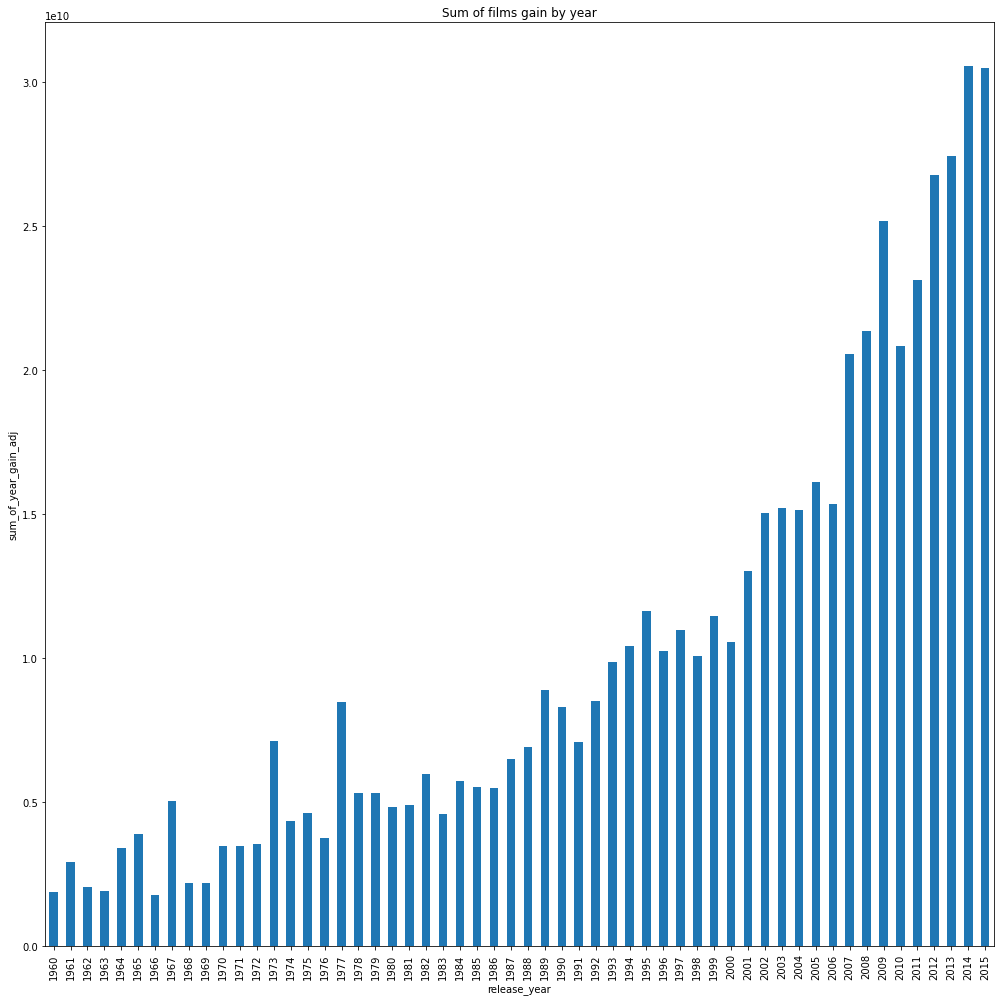

In [55]:
df.groupby('release_year').sum()['gain_adj'].plot(kind='bar',
                                                  figsize=(17, 17),
                                                  title='Sum of films gain by year',
                                                  ylabel='sum_of_year_gain_adj');

We can say that the total year film gain evolution over the years is greatly increasing. Year `2014` is the year of biggest gain overall time, and year `2015` comes closer.

What if we group `release_year` by 5 years?? Let's see what happens.

### Research Question 5  What is the mean film gain over the years grouped by 5 years?

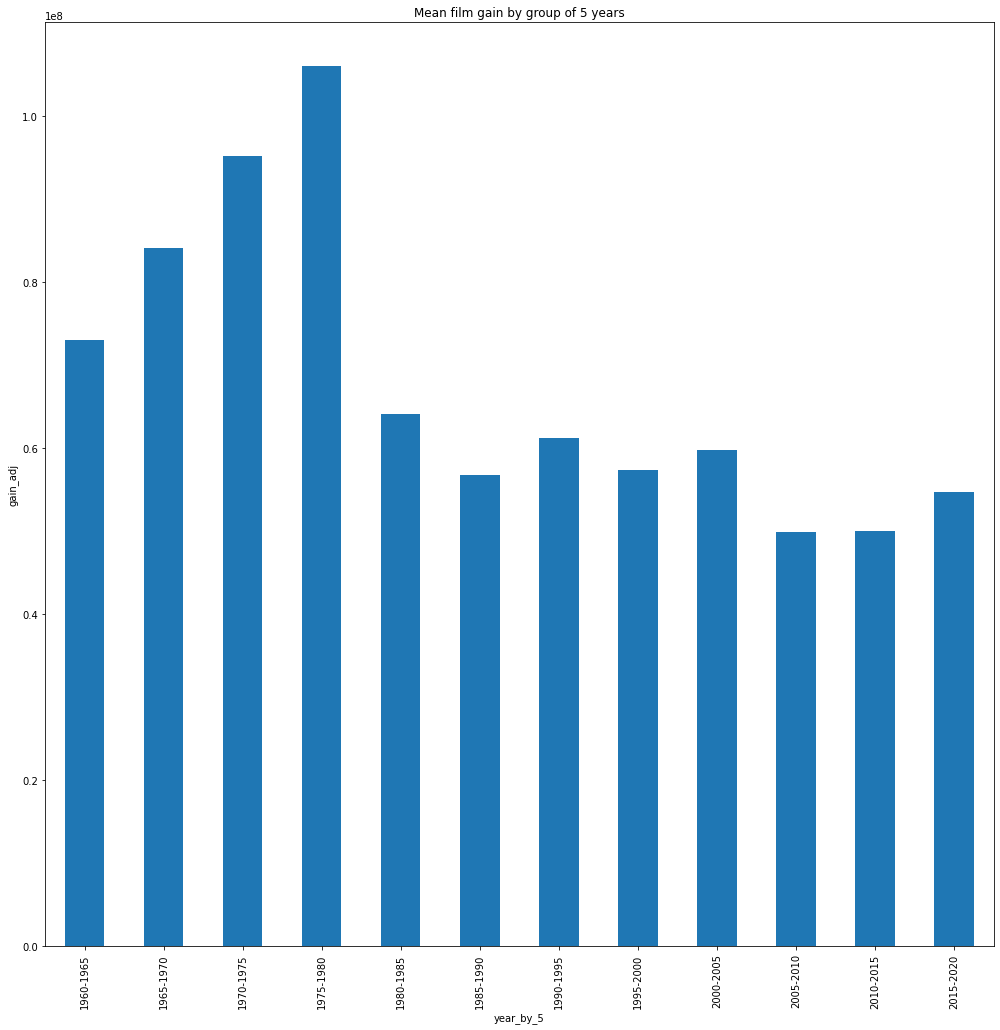

In [56]:
df.groupby('year_by_5').mean()['gain_adj'].plot(kind='bar', 
                                                   figsize=(17, 17),
                                                   title='Mean film gain by group of 5 years',
                                                   ylabel='gain_adj');

### Research Question 6  What is the total year film gain over the years by group of 5 years?

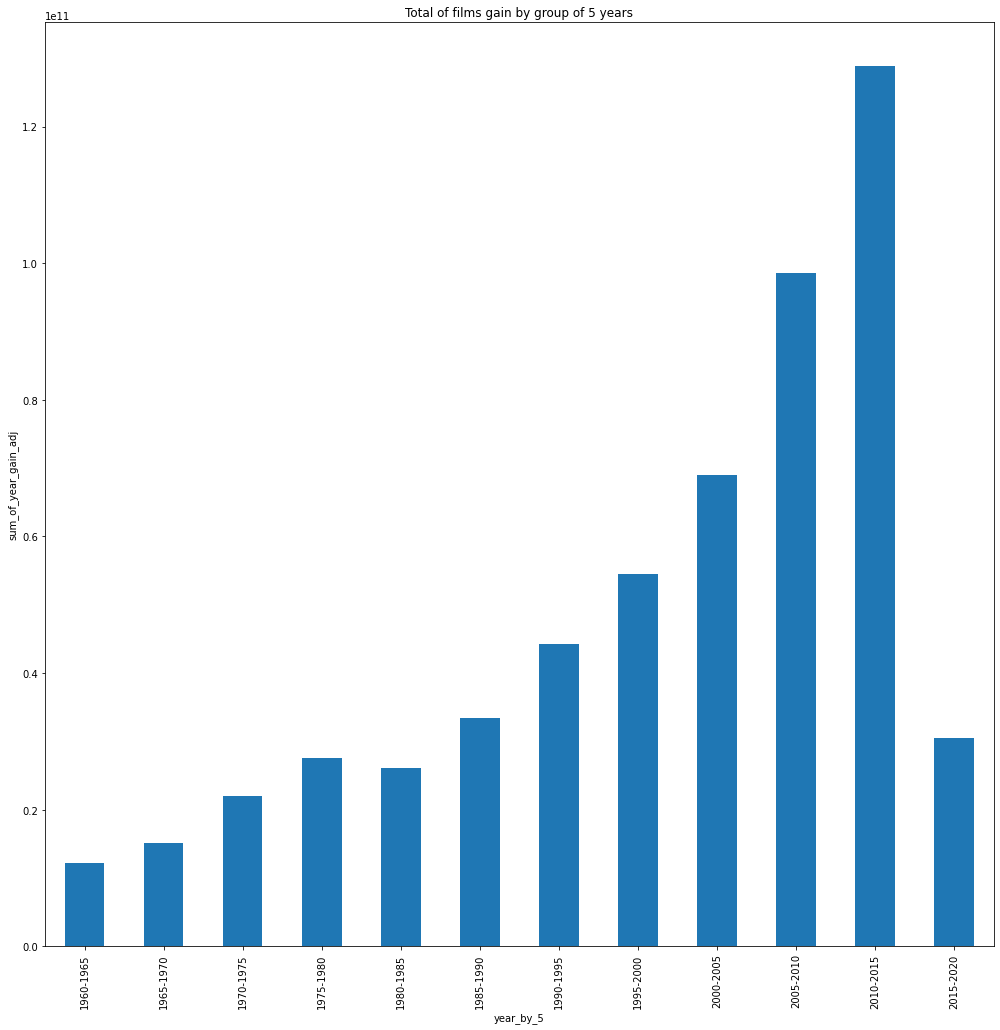

In [57]:
df.groupby('year_by_5').sum()['gain_adj'].plot(kind='bar',
                                               figsize=(17, 17),
                                               title='Total of films gain by group of 5 years',
                                               ylabel='sum_of_year_gain_adj');

What if we group `release_year` by 10 years?? Let's see what happens.

### Research Question 7  What is the mean film gain over the years grouped by 10 years?

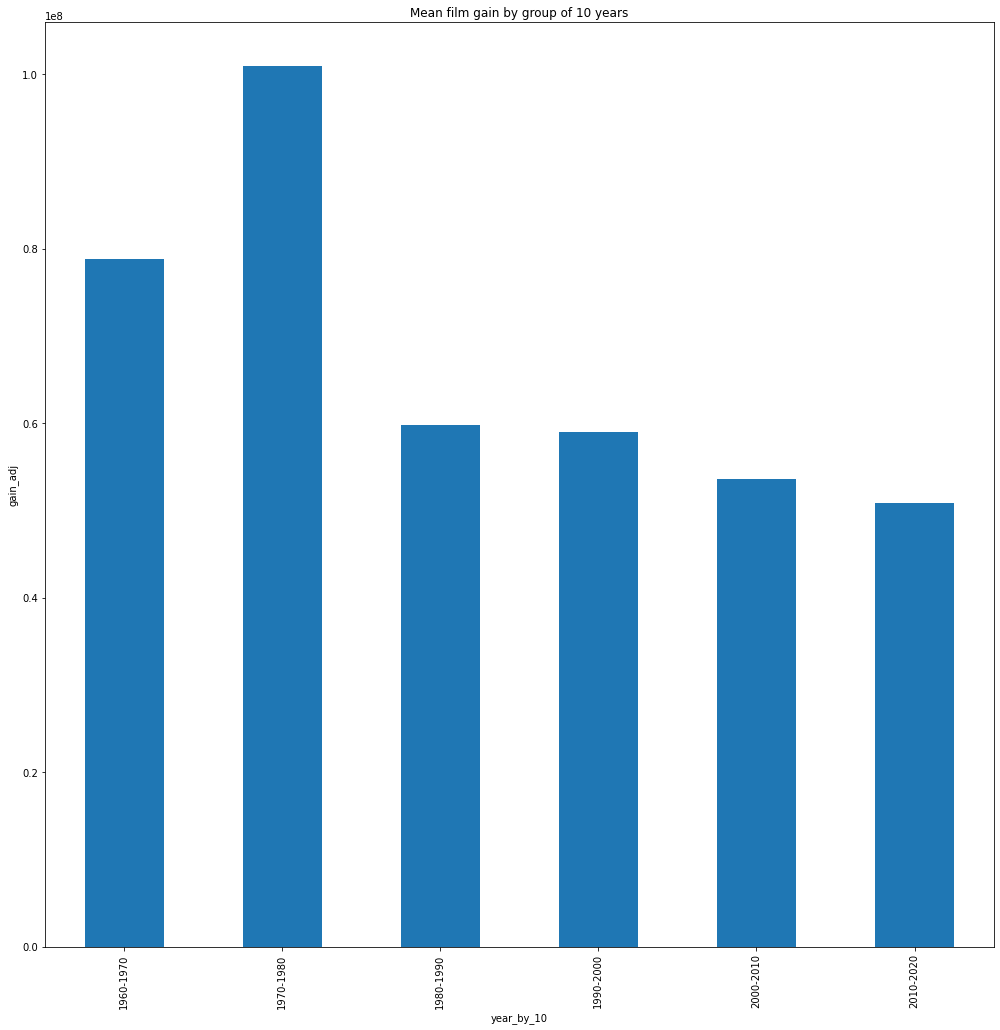

In [58]:
df.groupby('year_by_10').mean()['gain_adj'].plot(kind='bar', 
                                                   figsize=(17, 17),
                                                   title='Mean film gain by group of 10 years',
                                                   ylabel='gain_adj');

### Research Question 8  What is the best principal film genre overall time ?

In [59]:
df[['genre_01']].value_counts()

genre_01       
Drama              2223
Comedy             2084
Action             1478
Horror              853
Adventure           550
Thriller            474
Crime               361
Animation           345
Documentary         264
Fantasy             253
Science Fiction     196
Romance             161
Family              128
Mystery             118
Music                79
TV Movie             59
War                  57
Western              42
History              39
Foreign               6
dtype: int64

Let's plot this result.

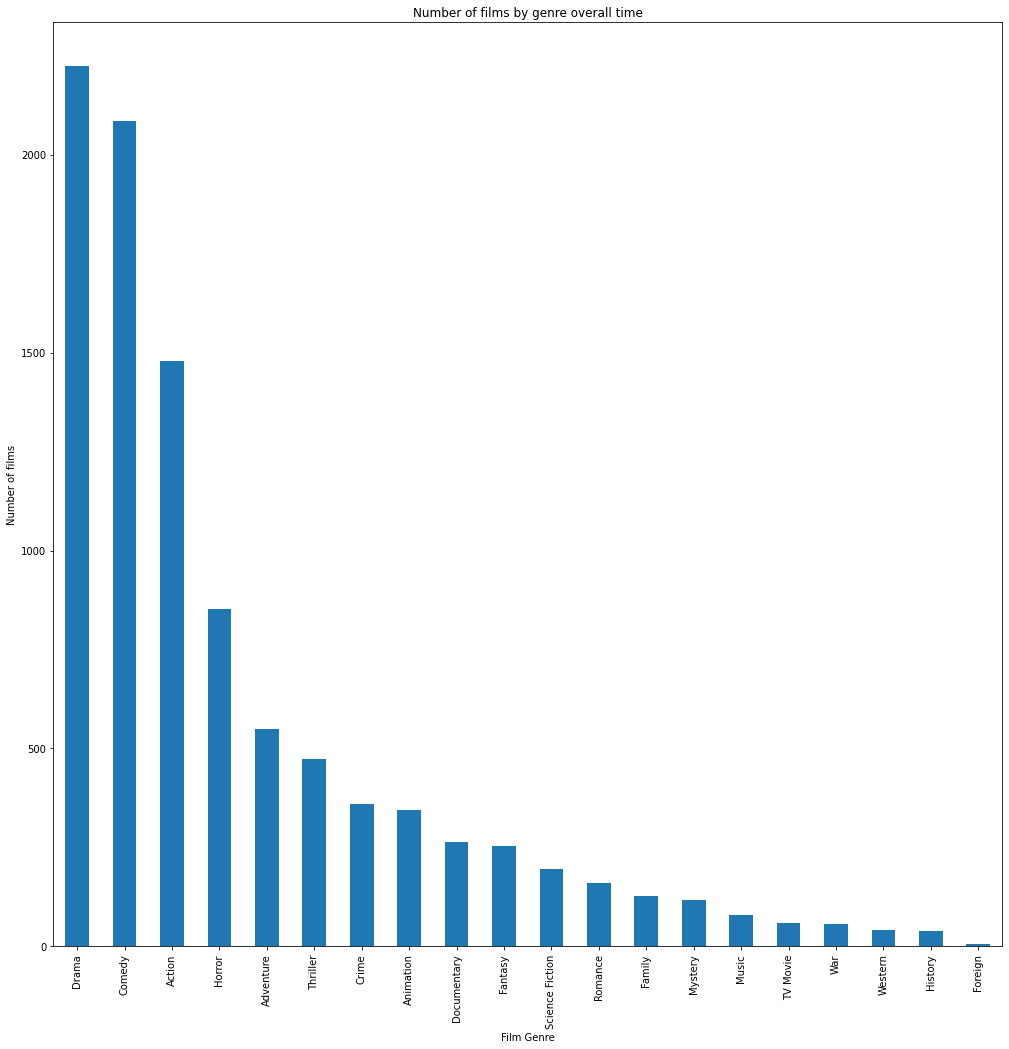

In [60]:
df['genre_01'].value_counts().plot(kind='bar',
                                   figsize=(17, 17),
                                   title="Number of films by genre overall time",
                                   xlabel='Film Genre',
                                   ylabel='Number of films');

The top 3 films genre are in order of popularity related to the total number of productions overall time:
1) `Drama`
2) `Comedy`
3) `Action`

The best genres are `Drama` and `Comedy`. If a film production company follow this, there will certainly be successfull in term of revenue.

### Research Question 9  What is the cast number for films overall time?

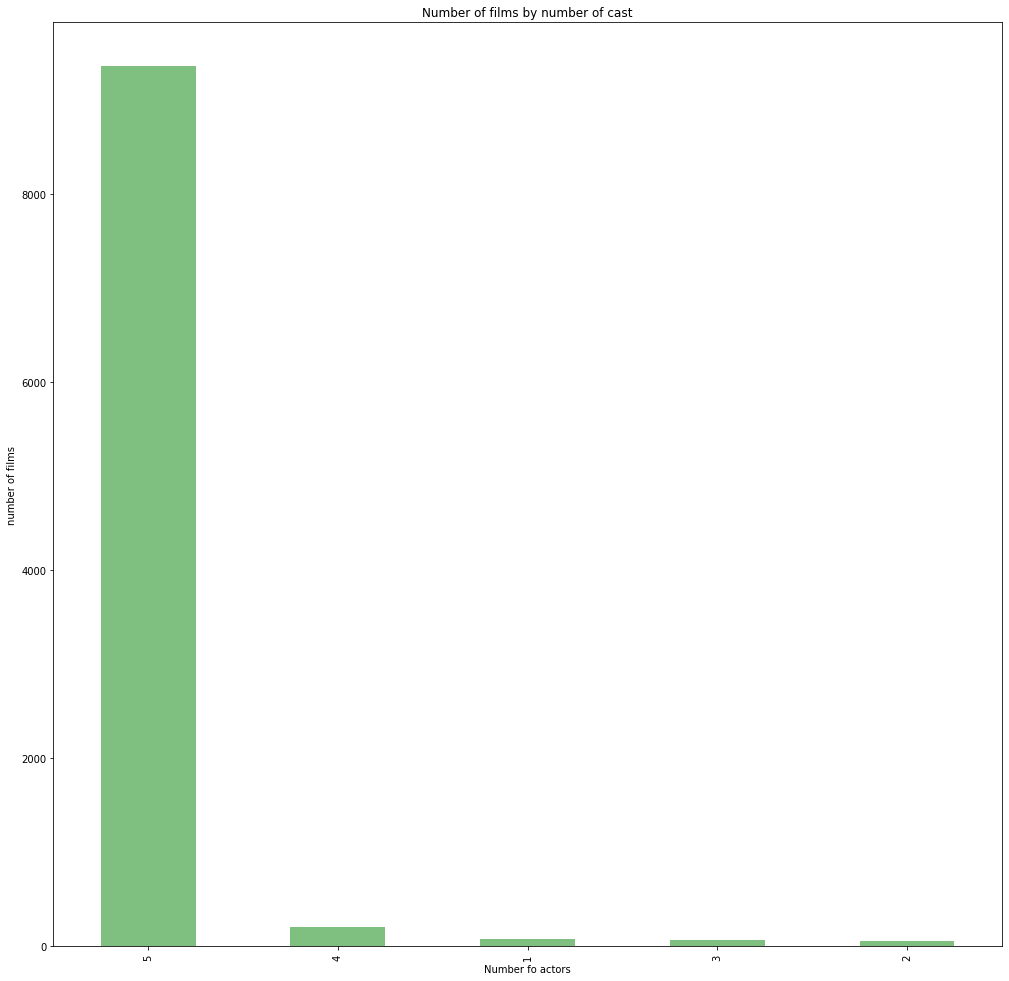

In [61]:
df['cast_num'].value_counts().plot(kind='bar',
                                   figsize=(17, 17),
                                   title='Number of films by number of cast',
                                   xlabel='Number fo actors',
                                   ylabel='number of films', 
                                   alpha=0.5, 
                                   color='green');

Looks like overall time, films used to have 5 principal actors in thier cast.

### Research Question 10  What is the mean runtime evolution over the years ?

In [62]:
df.groupby('release_year').mean()['runtime'].describe()

count     56.000000
mean     106.602212
std        5.396083
min       98.019280
25%      103.402211
50%      106.427703
75%      109.097091
max      125.833333
Name: runtime, dtype: float64

The mean film runtime overall time is `106 min` and  film runtime is between `103 min` and `109 min`.

Let's show our results.

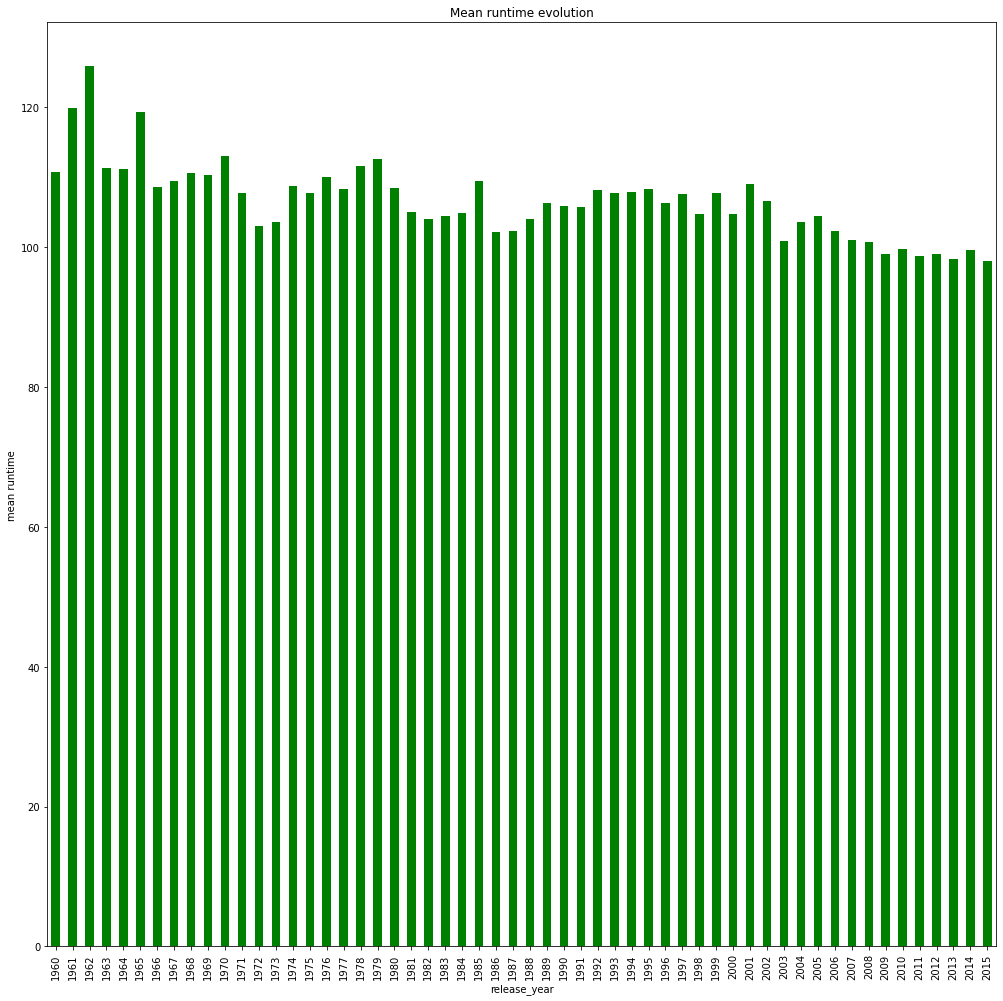

In [63]:
df.groupby('release_year').mean()['runtime'].plot(kind='bar',
                                                  figsize=(17, 17),
                                                  title='Mean runtime evolution',
                                                  ylabel='mean runtime', 
                                                  color = 'green');

### Research Question 11  What is the runtime of biggest films over the years?

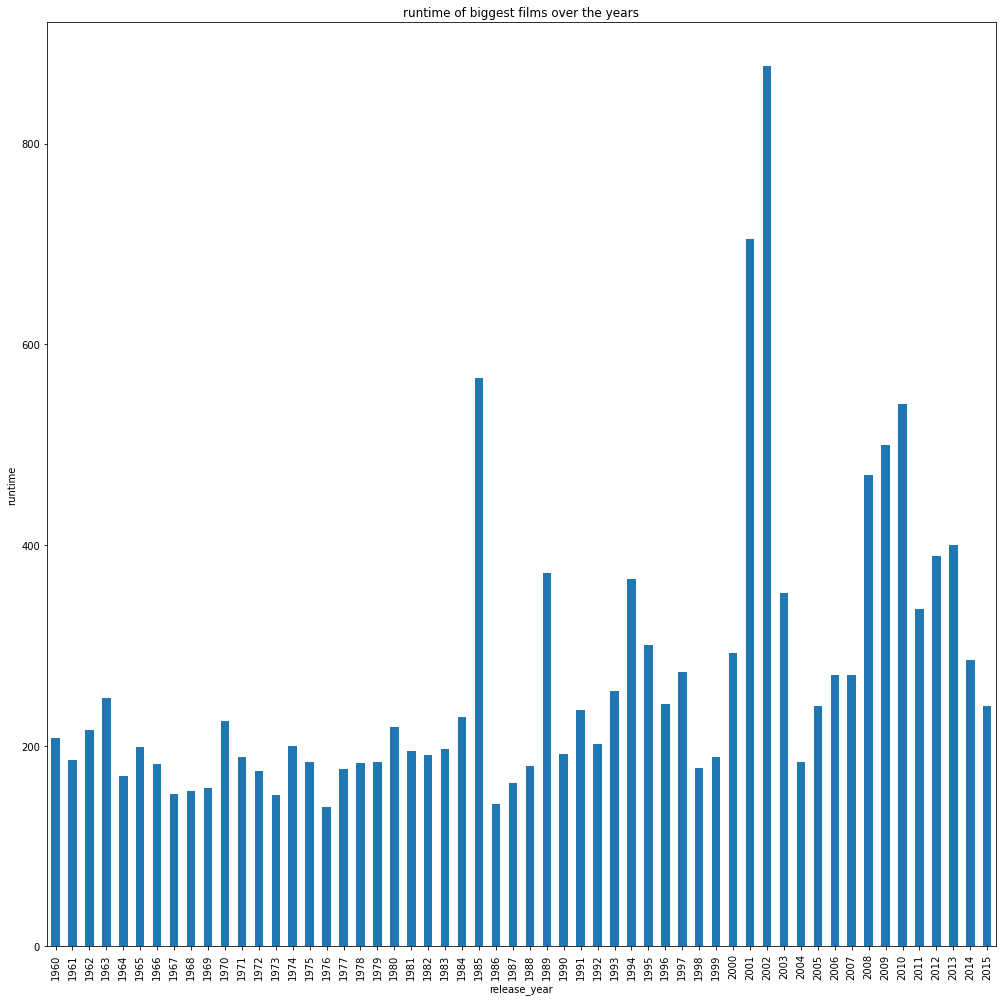

In [64]:
df.groupby('release_year')['runtime'].max().plot(kind='bar',
                                                  figsize=(17, 17),
                                                  title='runtime of biggest films over the years',
                                                  ylabel='runtime');

### Research Question 12  What is the biggest production company overall time ?

In [65]:
df.groupby('production_companies')[['gain_adj', 'production_companies']].value_counts().iloc[:].head(50)

production_companies                                                                               gain_adj     
10th Hole Productions|Anonymous Content|Ambush Entertainment|Maven Pictures|Foggy Bottom Pictures   3.764481e+07     1
10th Hole Productions|Benaroya Pictures|Four of a Kind Productions                                 -4.376180e+06     1
120dB Films|Louisiana Media Productions|Anchor Bay Films|Mimran Schur Pictures|Upload Films         5.238461e+07     1
120dB Films|Pimienta|The Salt Company International|Private Island Trax|Stun Creative               5.378866e+07     1
120dB Films|Scion Films|Voodoo Production Services|Chydzik Media Group|First Wedding Productions    1.334861e+03     1
1492 Pictures|Dune Entertainment|Fox 2000 Pictures|Sunswept Entertainment|Dune Entertainment III    7.916853e+07     1
1492 Pictures|Warner Bros.|Heyday Films                                                             1.048582e+09     1
1492 Pictures|Warner Bros.|Heyday Films|MIRACLE Produc

In [66]:
df.groupby('release_year')[['gain_adj', 'production_companies']].value_counts().iloc[:].head(50)

release_year  gain_adj       production_companies                                                  
1960           3.764481e+07  Twentieth Century Fox Film Corporation                                    3
               2.141847e+07  The Mirisch Corporation|Alpha Productions                                 1
               3.764481e+07  Woodfall Film Productions                                                 1
               5.153505e+07  George Pal Productions|Galaxy Films Inc.                                  1
               5.430971e+07  Paramount Pictures|Jerry Lewis Productions                                1
               5.507407e+07  Alta Vista Productions                                                    1
               5.559018e+07  Metro-Goldwyn-Mayer (MGM)                                                 1
               5.684358e+07  Santa Clara Productions                                                   1
               1.622053e+08  United Artists|The Mirisch Comp

In [67]:
df[['release_year', 'gain_adj']].head(30).groupby('release_year').max().iloc[:].tail(60)

,gain_adj
release_year,
2015,1.718723e+09


In [68]:
df[['release_year', 'gain_adj']].groupby(['release_year']).max().iloc[0:3]

,gain_adj
release_year,
1960,3.539024e+08
1961,1.545635e+09
1962,4.216943e+08


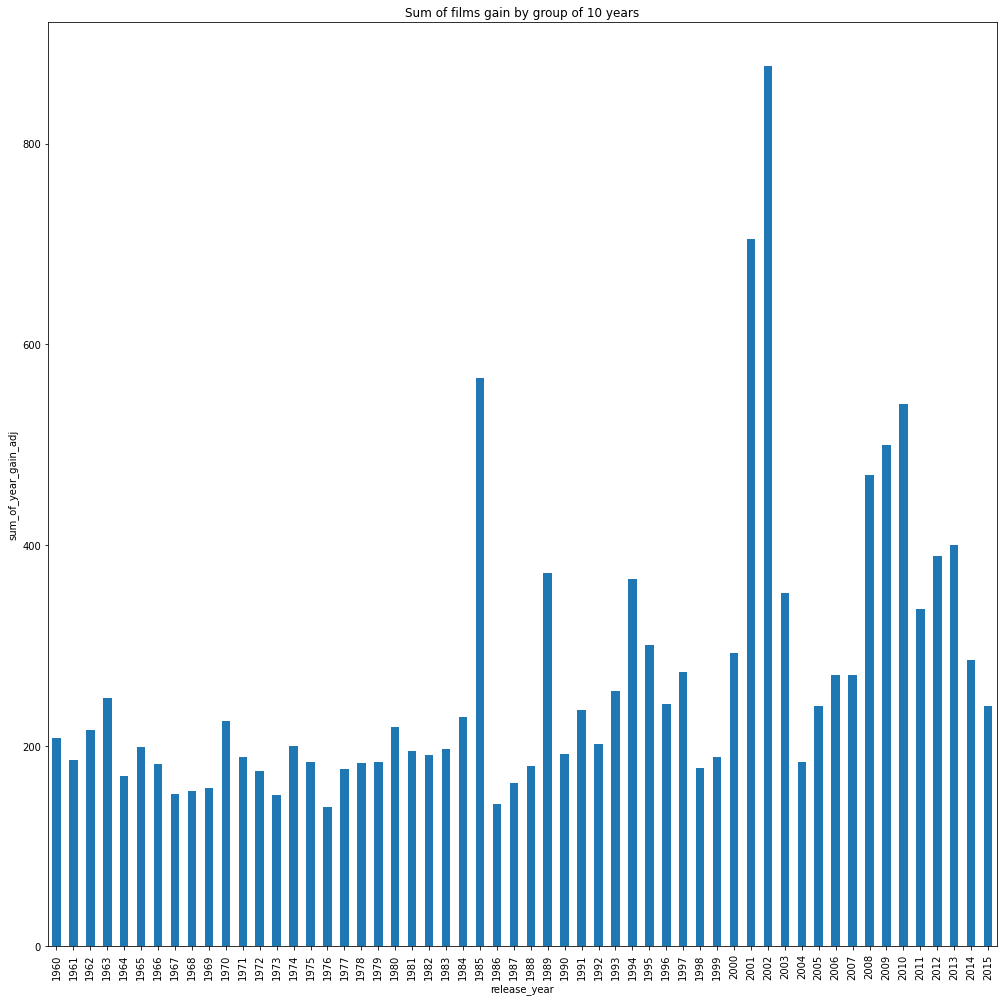

In [69]:
df.groupby('release_year')['runtime'].max().plot(kind='bar',
                                                  figsize=(17, 17),
                                                  title='Sum of films gain by group of 10 years',
                                                  ylabel='sum_of_year_gain_adj');

Yeah, it is confusing and unbelievable, but I double checked the dataset, and there is no error from me though. We can conclude that there are unrealistic values within our dataset, regarding the maximum film runtime over the years.

In [70]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [71]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [72]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### Research Question 2  (Replace this header name!)

In [73]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### Research Question 2  (Replace this header name!)

In [74]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### Research Question 2  (Replace this header name!)

In [75]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [79]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb', '--to', 'pdf'])

0

In [80]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb', '--to', 'html'])

0